In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

# Loading in data

## Statistical sectors

In [32]:
os.chdir('D:\Python\SECT_POP')

path = 'data'

files = []

# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if re.search('SECTOR(S|EN).*xlsx',file):
            files.append(os.path.join(r, file))

            datasets = []
for i, file in enumerate(files):
    df = pd.read_excel(file)
    if 'OPPERVLAKKTE IN HM²' in df.columns:
        df = df.rename(columns = {'OPPERVLAKKTE IN HM²':'OPPERVLAKTE IN HM²'})
        print('Fixed erroneous column name.')
    df['JAAR'] = file[-9:-5]
    datasets.append(df)

df = pd.concat(datasets)

df = df[['JAAR','CD_REFNIS','CD_SECTOR','OPPERVLAKTE IN HM²','POPULATION','TX_DESCR_NL','TX_DESCR_SECTOR_NL']]
df['CD_REFNIS_SECTOR'] = df['CD_REFNIS'].apply(str) + df['CD_SECTOR'].apply(str)
df.set_index(df['JAAR'].map(str) + '_' + df['CD_REFNIS_SECTOR'].map(str))

df.head()


Fixed erroneous column name.
d:\Python\SECT_POP\.env\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,JAAR,CD_REFNIS,CD_SECTOR,OPPERVLAKTE IN HM²,POPULATION,TX_DESCR_NL,TX_DESCR_SECTOR_NL,CD_REFNIS_SECTOR
0,2019,11001,11001A00-,53.157994,2509,Aartselaar,AARTSELAAR-CENTRUM,1100111001A00-
1,2019,11001,11001A01-,67.114560,2687,Aartselaar,DE LEEUWERIK,1100111001A01-
2,2019,11001,11001A020,28.084323,713,Aartselaar,BUERSTEDE,1100111001A020
3,2019,11001,11001A030,43.102217,436,Aartselaar,YSSELAAR,1100111001A030
4,2019,11001,11001A042,25.561896,350,Aartselaar,KLEINE GRIPPE,1100111001A042


## Tax data

In [33]:
tax = pd.read_excel('data\TF_PSNL_INC_TAX_SECTOR.xlsx', converters = {'CD_YEAR':str, 'CD_REFNIS_SECTOR':str})
tax = tax[['CD_YEAR','CD_REFNIS_SECTOR','MS_NBR_NON_ZERO_INC','MS_TOT_NET_TAXABLE_INC','MS_AVG_TOT_NET_TAXABLE_INC','MS_MEDIAN_NET_TAXABLE_INC','MS_INT_QUART_DIFF','MS_INT_QUART_COEFF','MS_INT_QUART_ASSYM']]


In [34]:
tax.columns = ['TAX_' + str(value) for value in tax.columns.values]
tax.head()


,TAX_CD_YEAR,TAX_CD_REFNIS_SECTOR,TAX_MS_NBR_NON_ZERO_INC,TAX_MS_TOT_NET_TAXABLE_INC,TAX_MS_AVG_TOT_NET_TAXABLE_INC,TAX_MS_MEDIAN_NET_TAXABLE_INC,TAX_MS_INT_QUART_DIFF,TAX_MS_INT_QUART_COEFF,TAX_MS_INT_QUART_ASSYM
0,2005,11001A00-,1203,34861255.99,28978.600158,21962.00,21856.30,99.518714,21.614454
1,2005,11001A01-,1509,52985912.47,35113.262074,25261.02,28117.14,111.306432,31.353118
2,2005,11001A020,449,16851901.45,37532.074499,25591.38,32363.15,126.461136,35.181279
3,2005,11001A030,245,7074667.86,28876.195347,22650.75,24245.63,107.041180,27.381388
4,2005,11001A042,204,12979299.65,63624.017892,28843.86,40705.23,141.122686,38.629459


## Real Estate data

In [35]:
immo = pd.read_excel('data\TF_IMMO_SECTOR.xlsx', dtype=str)
immo = immo.rename(columns={'CD_STAT_SECTOR':'CD_REFNIS_SECTOR'})
immo = immo.drop(columns = 'CD_TYPE_FR')
immo.columns = ['IMMO_' + str(value) for value in immo.columns.values]

immo.head()

,IMMO_CD_REFNIS_SECTOR,IMMO_CD_YEAR,IMMO_CD_TYPE,IMMO_CD_TYPE_NL,IMMO_MS_TRANSACTIONS,IMMO_MS_P25,IMMO_MS_P50 (MEDIAN_PRICE),IMMO_MS_P75
0,11001A00-,2013,B001,Huizen met 2 of 3 gevels (gesloten + halfopen ...,17,190000,266000,320000
1,11001A00-,2014,B001,Huizen met 2 of 3 gevels (gesloten + halfopen ...,20,197500,233750,294000
2,11001A00-,2015,B001,Huizen met 2 of 3 gevels (gesloten + halfopen ...,14,NaN,NaN,NaN
3,11001A00-,2016,B001,Huizen met 2 of 3 gevels (gesloten + halfopen ...,16,NaN,NaN,NaN
4,11001A00-,2017,B001,Huizen met 2 of 3 gevels (gesloten + halfopen ...,20,240000,305600,339000


# Destelbergen

In [39]:
db = df[df['TX_DESCR_NL'] == 'Destelbergen']
db.loc[db['TX_DESCR_SECTOR_NL'].str.contains('EENDBEEKEINDE'),'TX_DESCR_SECTOR_NL'] = 'EENBEEKEINDE'

db.head()


,JAAR,CD_REFNIS,CD_SECTOR,OPPERVLAKTE IN HM²,POPULATION,TX_DESCR_NL,TX_DESCR_SECTOR_NL,CD_REFNIS_SECTOR
8474,2019,44013,44013A00-,39.305953,635,Destelbergen,DESTELBERGEN-DORP,4401344013A00-
8475,2019,44013,44013A011,54.723231,1067,Destelbergen,BORREMS,4401344013A011
8476,2019,44013,44013A022,79.743017,474,Destelbergen,RAMEN,4401344013A022
8477,2019,44013,44013A033,61.495175,880,Destelbergen,HUL,4401344013A033
8478,2019,44013,44013A042,89.295734,763,Destelbergen,DE DAM - VISSERSHOEK,4401344013A042


In [18]:
db = db.merge(tax, left_on = ['JAAR','CD_REFNIS_SECTOR'], right_on = ['TAX_CD_YEAR','TAX_CD_REFNIS_SECTOR'], how = 'left')
db.merge(immo,left_on = ['JAAR','CD_REFNIS_SECTOR'], right_on = ['IMMO_CD_YEAR','IMMO_CD_REFNIS_SECTOR'], how = 'left').tail()

Waar zijn huizenprijzen het hoogst?

Hoe evolueerden huizenprijzen in elke wijk?

Is er een relatie tussen bevolkingsgroei en huizenprijzen?

Wie wordt relatief gezien rijker?

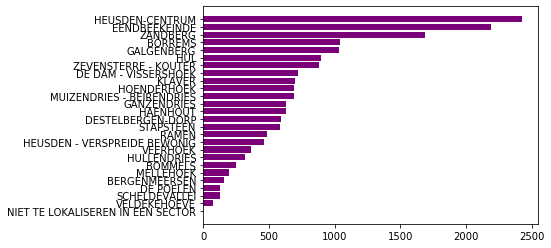

In [40]:

d = destelbergen
d = d.sort_values('POPULATION', ascending = False)
fig, ax = plt.subplots()
ax.barh(d[d.JAAR == '2018'].TX_DESCR_SECTOR_NL, d[d.JAAR == '2018'].POPULATION, color = '#7a0177')
ax.invert_yaxis()
plt.show()

In [41]:
destelbergen_initieel = destelbergen[destelbergen.JAAR == '2011'][['CD_REFNIS_SECTOR','POPULATION']]

destelbergen_initieel = destelbergen_initieel.rename(columns={'POPULATION':'POPULATION_INITIAL'})
destelbergen = destelbergen.merge(destelbergen_initieel, on = 'CD_REFNIS_SECTOR')

destelbergen.head()

destelbergen['EVOLUTION'] = destelbergen['POPULATION'] / destelbergen['POPULATION_INITIAL'] * 100
destelbergen['JAAR'] = pd.to_datetime(destelbergen['JAAR'], format='%Y')


d:\Python\SECT_POP\.env\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


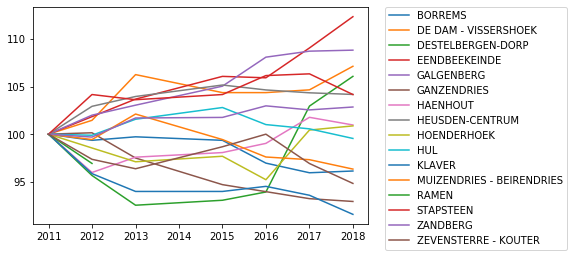

In [42]:
destelbergen = destelbergen.sort_values(['TX_DESCR_SECTOR_NL','JAAR'],ascending=True)
destelbergen = destelbergen[destelbergen['POPULATION'] > 500]

fig, ax = plt.subplots()


for wijk in destelbergen['TX_DESCR_SECTOR_NL'].unique():

    ax.plot(destelbergen[destelbergen.TX_DESCR_SECTOR_NL == wijk]['JAAR'], destelbergen[destelbergen.TX_DESCR_SECTOR_NL == wijk]['EVOLUTION'], label = wijk)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


In [43]:
immo.head()

,CD_REFNIS_SECTOR,CD_YEAR,CD_TYPE,CD_TYPE_NL,CD_TYPE_FR,MS_TRANSACTIONS,MS_P25,MS_P50 (MEDIAN_PRICE),MS_P75
0,11001A00-,2013,B001,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,17,190000,266000,320000
1,11001A00-,2014,B001,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,20,197500,233750,294000
2,11001A00-,2015,B001,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,14,NaN,NaN,NaN
3,11001A00-,2016,B001,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,16,NaN,NaN,NaN
4,11001A00-,2017,B001,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,20,240000,305600,339000
